In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Suponiendo que tu DataFrame se llama df
df = pd.read_csv('/content/drive/MyDrive/EspecializacionA&DS/Monografia/2doSemestre/DataFinal_Amazon.csv')  # Descomenta y proporciona la ruta si estás cargando un archivo CSV

<ipython-input-3-1f8e3361d82a>:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/EspecializacionA&DS/Monografia/2doSemestre/DataFinal_Amazon.csv')  # Descomenta y proporciona la ruta si estás cargando un archivo CSV


In [ ]:
# Información General del DataFrame
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800571 entries, 0 to 4800570
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   overall         float64
 1   reviewerID      object 
 2   asin            object 
 3   reviewText      object 
 4   summary         object 
 5   brand           object 
 6   price           float64
 7   extracted_rank  int64  
 8   reviewDate      object 
 9   category        object 
dtypes: float64(2), int64(1), object(7)
memory usage: 366.3+ MB
None
   overall      reviewerID        asin  \
0      3.0  A1BB77SEBQT8VX  B00007GDFV   
1      3.0  A1BB77SEBQT8VX  B00007GDFV   
2      3.0   AHWOW7D1ABO9C  B00007GDFV   
3      3.0   AHWOW7D1ABO9C  B00007GDFV   
4      3.0   AKS3GULZE0HFC  B00007GDFV   

                                          reviewText  \
0  mother - in - law wanted it as a present for h...   
1  mother - in - law wanted it as a present for h...   
2  Item is of good quality. Looks great, too. But

In [ ]:
# Análisis de Valores Faltantes
missing_values = df.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)
print("Porcentaje de valores faltantes:\n", (missing_values/len(df))*100)

Valores faltantes por columna:
 overall                0
reviewerID             0
asin                   0
reviewText             5
summary               27
brand             429942
price                  0
extracted_rank         0
reviewDate             0
category               0
dtype: int64
Porcentaje de valores faltantes:
 overall           0.000000
reviewerID        0.000000
asin              0.000000
reviewText        0.000104
summary           0.000562
brand             8.956060
price             0.000000
extracted_rank    0.000000
reviewDate        0.000000
category          0.000000
dtype: float64


In [ ]:
# Resumen Estadístico de las Variables Numéricas
print(df.describe())


            overall         price  extracted_rank
count  4.800571e+06  4.800571e+06    4.800571e+06
mean   4.260527e+00  9.346523e+01    3.631274e+05
std    1.166258e+00  2.293804e+03    7.122776e+05
min    1.000000e+00  1.000000e-02    0.000000e+00
25%    4.000000e+00  9.990000e+00    1.813900e+04
50%    5.000000e+00  1.599000e+01    9.874500e+04
75%    5.000000e+00  2.800000e+01    4.592440e+05
max    5.000000e+00  7.760000e+04    2.707478e+07


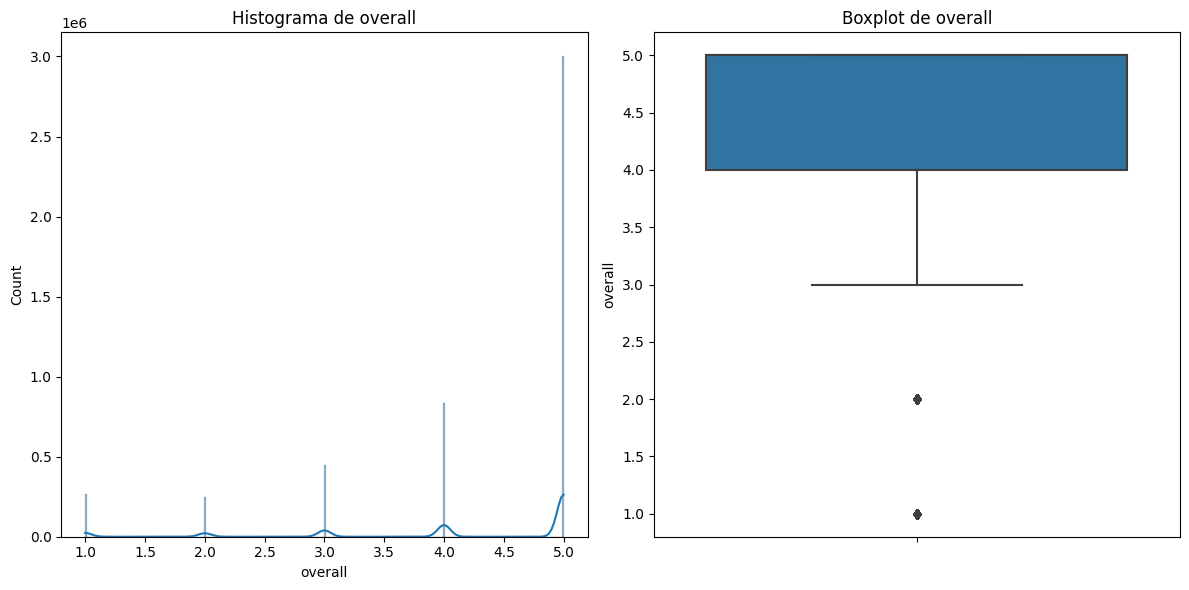

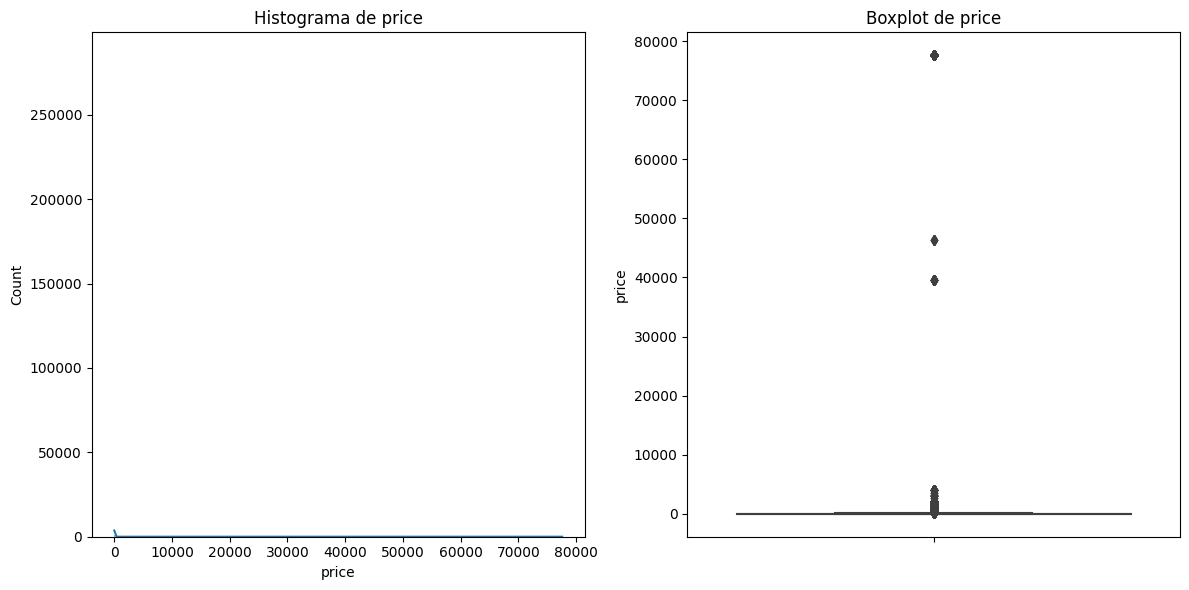

In [ ]:
# Histogramas y Boxplots para Variables Continuas
numerical_columns = ['overall', 'price']

for col in numerical_columns:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histograma de {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')

    plt.tight_layout()
    plt.show()

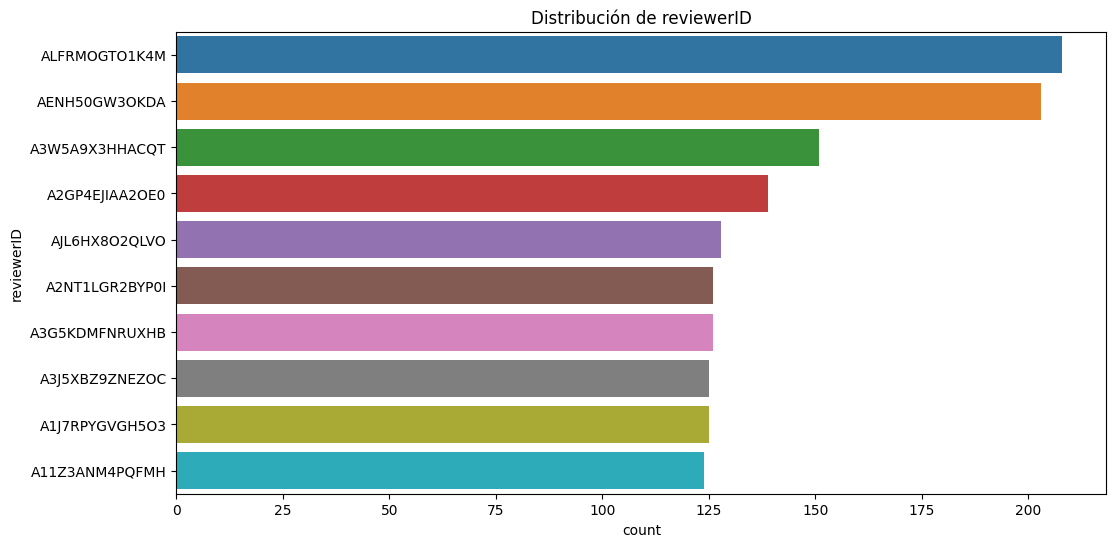

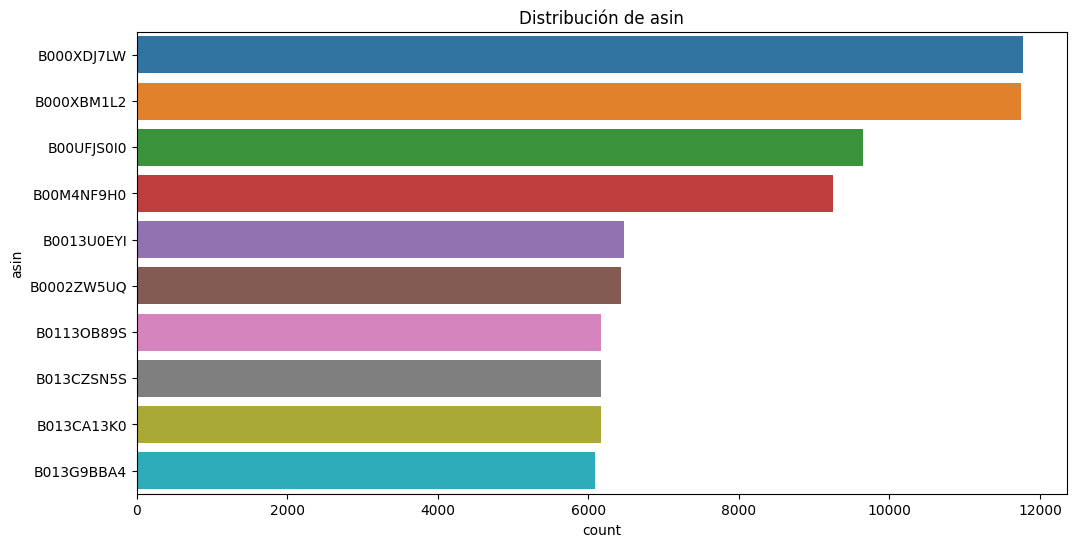

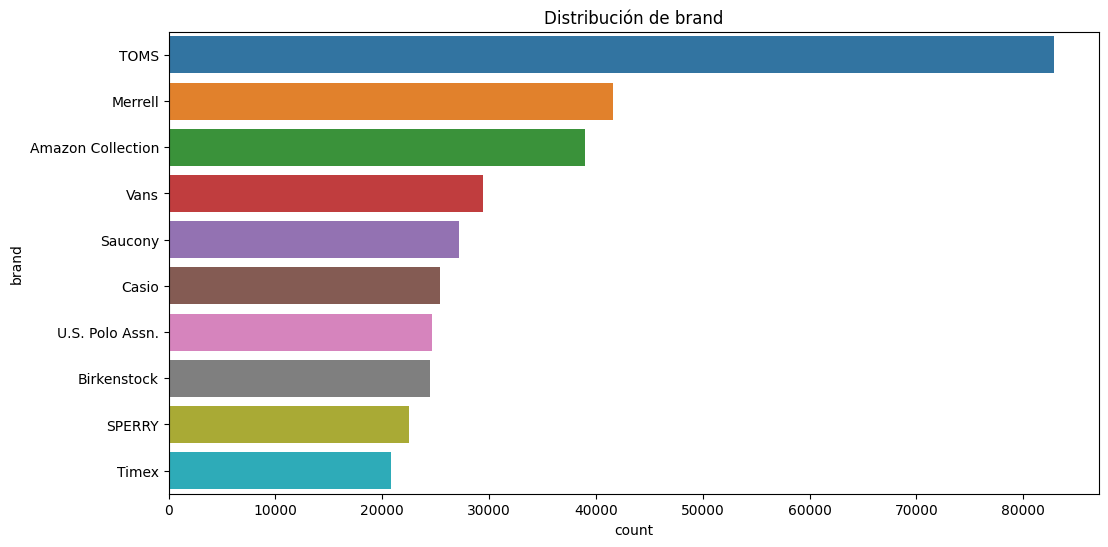

In [ ]:
# Análisis de Variables Categóricas
categorical_columns = ['reviewerID', 'asin', 'brand']

for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y=col, order = df[col].value_counts().index[:10])
    plt.title(f'Distribución de {col}')
    plt.show()

In [ ]:
# Convert 'reviewDate' to datetime format
df['reviewDate'] = pd.to_datetime(df['reviewDate'])

# Create new temporal columns
df['year'] = df['reviewDate'].dt.year
df['month'] = df['reviewDate'].dt.month
df['day'] = df['reviewDate'].dt.day
df['weekday'] = df['reviewDate'].dt.weekday

print(df[['reviewDate', 'year', 'month', 'day', 'weekday']].head())


  reviewDate  year  month  day  weekday
0 2013-09-22  2013      9   22        6
1 2013-09-22  2013      9   22        6
2 2013-07-17  2013      7   17        2
3 2013-07-17  2013      7   17        2
4 2013-04-13  2013      4   13        5


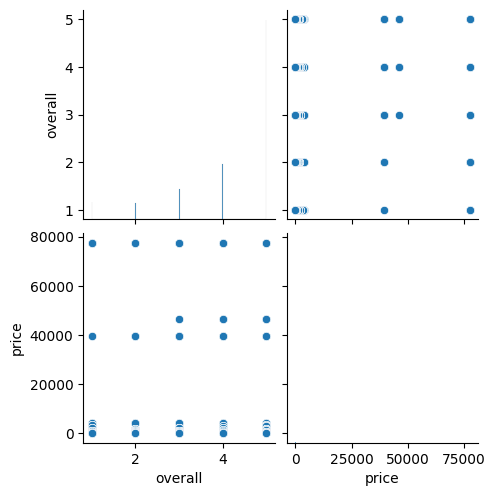

In [ ]:
# Análisis Bivariante: 'overall' vs. otras variables
sns.pairplot(df, vars=['overall', 'price'])
plt.show()

<ipython-input-12-0f7738ce0abf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


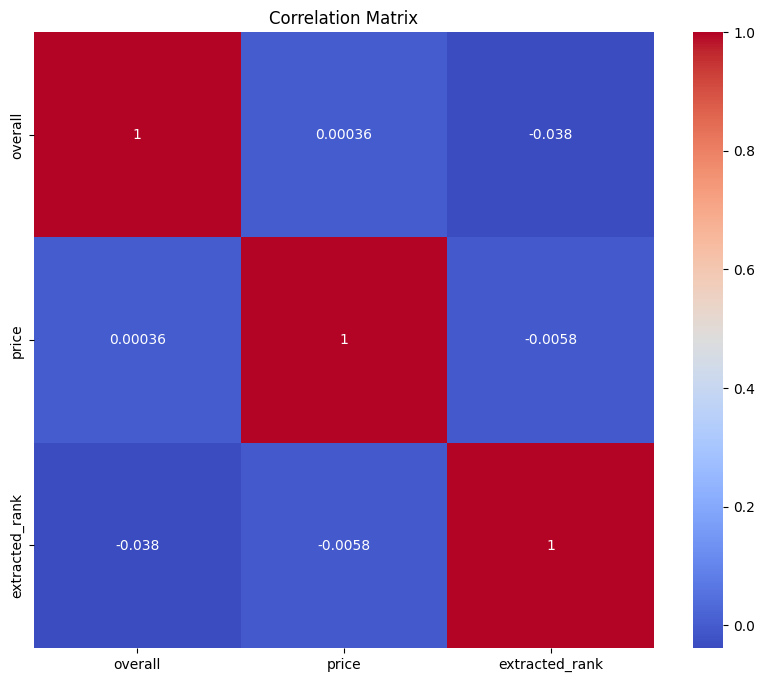

In [ ]:
# Correlación entre Variables
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

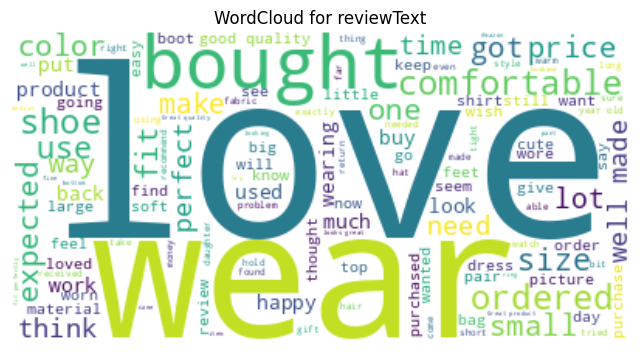

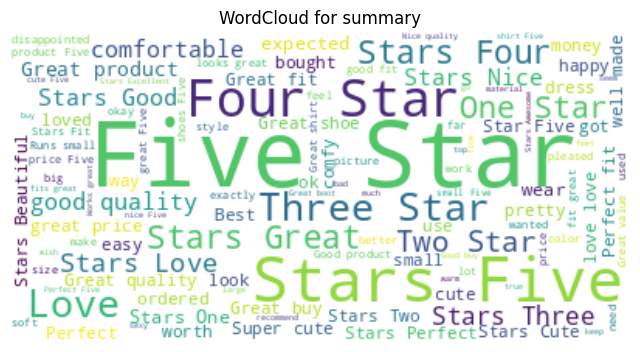

In [ ]:
# Análisis de Texto (opcional): WordClouds para 'reviewText' y 'summary'
from wordcloud import WordCloud

text_columns = ['reviewText', 'summary']

for col in text_columns:
    text_data = " ".join(review for review in df[col].dropna())
    wordcloud = WordCloud(background_color='white').generate(text_data)

    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {col}')
    plt.show()